# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [16]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [17]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [18]:
import numpy as np

In [19]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [20]:
iris_dataset_1 = np.delete(iris_dataset['data'], 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset['data'], 0, axis=1)

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

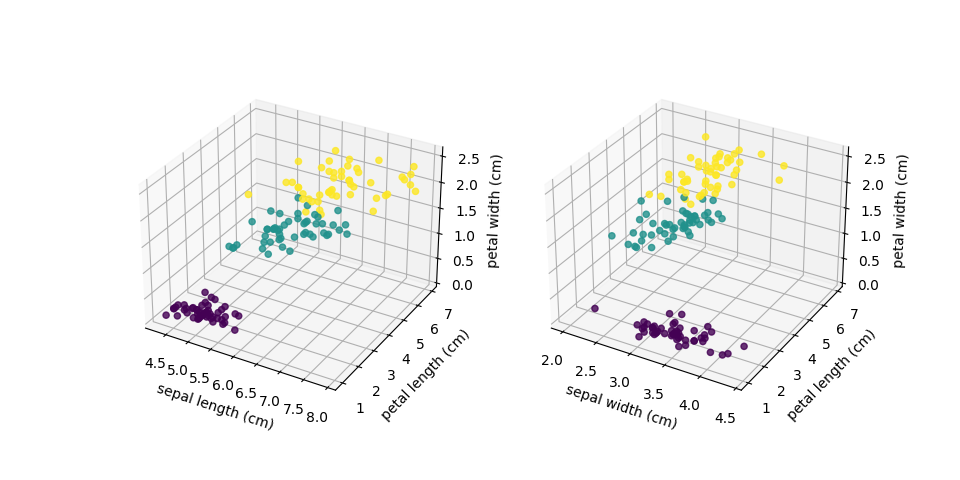

In [29]:
# если работаете в интерактивной оболочке IPython 
# % matplotlib inline
%matplotlib widget

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.5))

ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
ax_2 = fig.add_subplot(1, 2, 2, projection='3d')

ax_1.scatter3D(iris_dataset_1[:, [0]],
                iris_dataset_1[:, [1]],
                iris_dataset_1[:, [2]],
                c=iris_dataset['target'],
                alpha=0.8
                )
ax_1.set_xlabel('sepal length (cm)')
ax_1.set_ylabel('petal length (cm)')
ax_1.set_zlabel('petal width (cm)')

ax_2.scatter3D(iris_dataset_2[:, [0]],
                iris_dataset_2[:, [1]],
                iris_dataset_2[:, [2]],
                c=iris_dataset.target,
                alpha=0.8
                )
ax_2.set_xlabel('sepal width (cm)')
ax_2.set_ylabel('petal length (cm)')
ax_2.set_zlabel('petal width (cm)')

plt.show()

**Пример** построения трехмерного графика

In [22]:
# ax = plt.axes(projection='3d')

# zdata = 15 * np.random.random(100) # точки оси Z
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
# colors = np.random.randint(3, size=100)

# ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

In [23]:
# ax = plt.axes(projection='3d')

# ### YOUR CODE HERE ###

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset.target, random_state=17)
classifier_1 = KNeighborsClassifier(n_neighbors=5)
classifier_1.fit(x_train_1, y_train_1)


x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset.target, random_state=17)
classifier_2 = KNeighborsClassifier(n_neighbors=5)
classifier_2.fit(x_train_2, y_train_2)

KNeighborsClassifier()

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_1 = accuracy_score(y_test_1, classifier_1.predict(x_test_1))
accuracy_2 = accuracy_score(y_test_2, classifier_2.predict(x_test_2))

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')
# При одинаковом зерне разбиения обе модели дают результат лучше,
# чем модель с двумя признаками. При отличном зерне разбиения модель
# с фичами из первого датасета дает либо такой же результат, либо лучше
# по сравнению с моделью, обученной на втором датасете.

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [28]:
for _ in range(5):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset.target)

    for n in range(1, 21):
        classifier = KNeighborsClassifier(n_neighbors=n)
        classifier.fit(x_train_1, y_train_1)
        accuracy = accuracy_score(y_test_1, classifier.predict(x_test_1))
        print(f'{n=}, {accuracy=}')
    
    print()

# Лучшие результаты были получены при значении параметра n=7 и n=9

n=1, accuracy=0.9210526315789473
n=2, accuracy=0.9210526315789473
n=3, accuracy=0.9210526315789473
n=4, accuracy=0.9210526315789473
n=5, accuracy=0.9210526315789473
n=6, accuracy=0.9210526315789473
n=7, accuracy=0.9210526315789473
n=8, accuracy=0.9210526315789473
n=9, accuracy=0.9210526315789473
n=10, accuracy=0.9210526315789473
n=11, accuracy=0.9210526315789473
n=12, accuracy=0.9210526315789473
n=13, accuracy=0.9210526315789473
n=14, accuracy=0.9210526315789473
n=15, accuracy=0.9210526315789473
n=16, accuracy=0.9210526315789473
n=17, accuracy=0.9210526315789473
n=18, accuracy=0.9473684210526315
n=19, accuracy=0.9473684210526315
n=20, accuracy=0.9473684210526315

n=1, accuracy=0.9473684210526315
n=2, accuracy=0.9210526315789473
n=3, accuracy=0.9210526315789473
n=4, accuracy=0.8947368421052632
n=5, accuracy=0.9473684210526315
n=6, accuracy=0.9210526315789473
n=7, accuracy=0.9473684210526315
n=8, accuracy=0.9210526315789473
n=9, accuracy=0.9210526315789473
n=10, accuracy=0.92105263157894